Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "George Massey"
STUDENTID = "230973275"

---

# MTH765P - Coursework 3
This is a template notebook for the third coursework assignment for MTH765P,
Closely follow the instructions in this template in order 
to complete the assessment and to obtain full marks. Please only
modify cells where you are instructed to do so. Note that you may add other cells.
Failure to comply may result in unexpected errors that can lead to mark deductions. **Please submit only this file, without changing its name to QMPlus.**


##### DO NOT FORGET TO REMOVE THE LINE  _raise NotImplementedError()_ after you answer the question.

Author: Primoz Skraba


As usual, we begin by loading the necessary libraries. You should not 
import any other libraries.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Question 1
---------
---------
 
Linear models and residuals

--------
--------

Run the next cell to load the first dataset.

--------




In [3]:
X = pd.read_csv('data.csv',sep=' ')
X.head()

,x,y
0,-1.167390,-40.099714
1,-1.082710,-19.151187
2,-1.063447,-16.397238
3,-1.061148,-11.336125
4,-0.993360,-19.188918


----

a.) **(2 points)** Use _numpy.polyfit()_ to fit a linear model to the data, storing the parameters into variables called _m_ and _b_ respectively for the slope and y-intercept. 

----

In [4]:
[m,b] = np.polyfit(X['x'],X['y'],1)

----

b.) **(5 points)** Compute the residual of the data with respect to the model and store them in a variable called _res_

----

In [5]:
res = X['y'] - (m*X['x']+b)

----

c.) **(4 points)** Plot an unnormalised histogram of the residuals with 30 bins

----

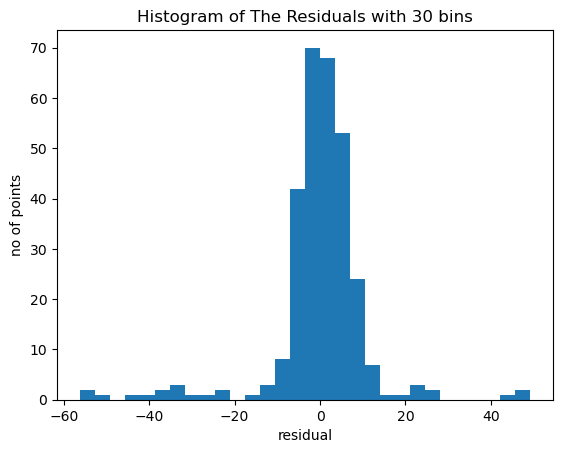

In [6]:
plt.hist(res, bins = 30);
plt.xlabel('residual')
plt.ylabel('no of points')
plt.title('Histogram of The Residuals with 30 bins');

----

d.) **(4 points)** Is the linear model a good fit? (one or two sentences)

----

It looks as though it is a good fit because most of the residuals fall around 0, meaning that the error is small. The histogram forms a normal like distribution, with a mean of 0 and few residuals being further than 10 either side of 0.

----

e.) **(8 points)** Complete the function below to compute hinges of the input x, which should be set at the 30th and 70th quantile.

----

In [7]:
def hinges(x):
    lower = np.quantile(x,0.30)
    upper = np.quantile(x,0.70)
    return lower,upper

----

f.) **(2 points)** Use the above function to compute the inner fences of the residuals. Store the results in the variables _lower_fence_ and _upper_fence_ respectively.

----

In [8]:
hinges = hinges(res)
step = hinges[1] - hinges[0]
lower_fence = hinges[0] - step*1.5
upper_fence = hinges[1] + step*1.5
print(lower_fence)
print(upper_fence)

-10.33084450852618
12.01983758563062


----

g.) **(3 points)** Create a new Dataframe called _Y_ with all the values corresponding to residuals which are beyond the inner fences removed.

----

In [9]:
Y = pd.DataFrame(X)
Y = Y[res.apply(lambda x: True if x >= lower_fence and x <= upper_fence else False)]

In [10]:
## Leave this cell it prints out the resulting dataframe
display(Y)

,x,y
1,-1.082710,-19.151187
2,-1.063447,-16.397238
3,-1.061148,-11.336125
4,-0.993360,-19.188918
5,-0.990390,-17.154749
...,...,...
293,0.993728,1.399987
294,0.999342,-6.721107
297,1.038887,-0.327475
298,1.081022,9.416868


----

h.) **(3 points)** Fit a new linear model and plot the  outliers as red points, the remainder of the points (non-outliers) as blue stars (\*), the original model as a black line and the new model shown as a green line. Store the new model parameters in the variables _m\_new_ and _b\_new_.

----

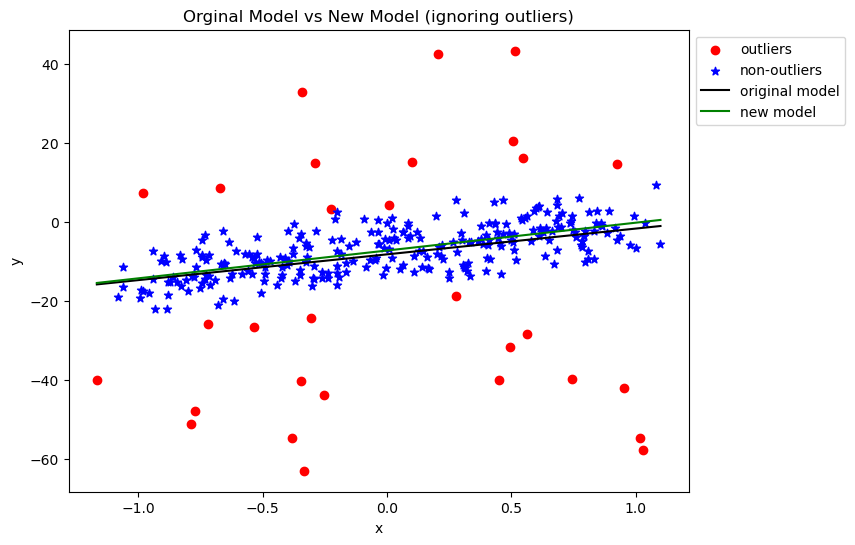

In [11]:
[m_new, b_new] = np.polyfit(Y['x'],Y['y'],1)

outliers = pd.DataFrame(X)
outliers = outliers[res.apply(lambda x: True if x < lower_fence or x > upper_fence else False)]

plt.figure(figsize = (8,6))
plt.scatter(outliers['x'], outliers['y'], c = 'r', label = 'outliers')
plt.scatter(Y['x'], Y['y'], c = 'b', marker = '*', label = 'non-outliers')
plt.plot(X['x'], m*X['x']+b, c = 'black', label = 'original model');
plt.plot(X['x'], m_new*X['x']+b_new, c = 'green', label = 'new model'); 
plt.xlabel('x')
plt.ylabel('y')
plt.title('Orginal Model vs New Model (ignoring outliers)')
plt.legend(loc = 'upper left', bbox_to_anchor = (1,1));

----

i.) **(4 points)** Is what you did above different from computing (and filtering) the outliers on the original data? If so, describe how, otherwise explain why they are the same. (a few sentences)

----

Yes, what we did was different. This is becuase we computed a model based on the orginal data and then removed outliers through working out lower and upper fences on the residual error. Where as the other method would be to first, before computing a model, find the lower and upper fences on the orginal data and removing outliers that way. These two ways would then lead to different points being classified as outliers and we would end up with a different model.

### Question  2

The next dataset is on the sales of video games. 

---------
---------

Use pandas to read in the file **vgsales.csv** into a dataframe called _games_



In [12]:
games = pd.read_csv('vgsales.csv')
games.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37



 ----
 
a.) **(3 points)** Find answers to the following questions about the dataframe.
- How many genres are there? Store the answer in a variable called _num_genres_. 
- How many publishers are there? Store the answer in a variable _num_publishers_.
- How many platforms are there? Store the answer in a variable _num_platforms_.

----


In [13]:
num_genres = games['Genre'].nunique()
num_publishers = games['Publisher'].nunique()
num_platforms = games['Platform'].nunique()
print(num_genres, num_publishers, num_platforms)

12 578 31


----

b.) **(4 points)** Create a box-and-whisker plot of Global Sales by genre.

----

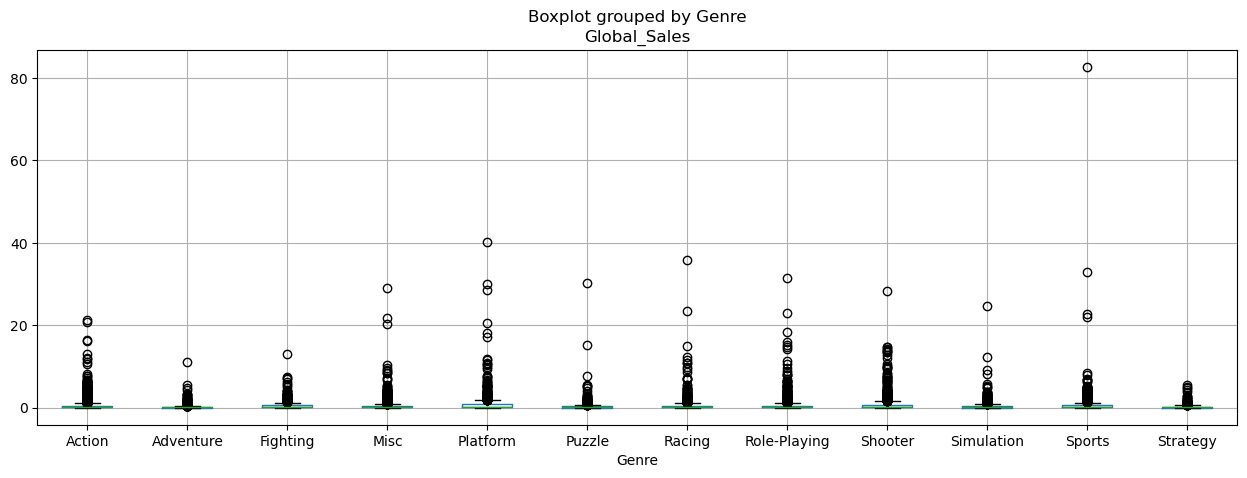

In [14]:
games.boxplot(column = ['Global_Sales'], by = 'Genre', figsize = (15,5));

----

c.) **(10 points)** Find the upper outer fence thresholds for each genre (assuming hinges at the 25th and 75th percentile). Store them in a dictionary {genre:upper outer fence} called ufence.

---

In [15]:
unique_genres = games['Genre'].unique()
ufence = {}
for genre in unique_genres:
    q1 = np.percentile(games[games['Genre'] == genre]['Global_Sales'], 25)
    q3 = np.percentile(games[games['Genre'] == genre]['Global_Sales'], 75)
    step = q3 - q1
    upper_outer_fence = step*3 + q3
    ufence[genre] = upper_outer_fence

print(ufence)

{'Sports': 1.9700000000000002, 'Platform': 2.89, 'Racing': 1.9100000000000001, 'Role-Playing': 1.88, 'Puzzle': 1.1099999999999999, 'Misc': 1.4599999999999997, 'Shooter': 2.6700000000000004, 'Simulation': 1.5299999999999998, 'Action': 1.79, 'Fighting': 1.9600000000000002, 'Adventure': 0.5800000000000001, 'Strategy': 0.9600000000000001}


----

d.) **(4 points)** Plot the unnormalised histogram with 20 bins for all sports games whose Global sales which are beyond the outer fence.


----


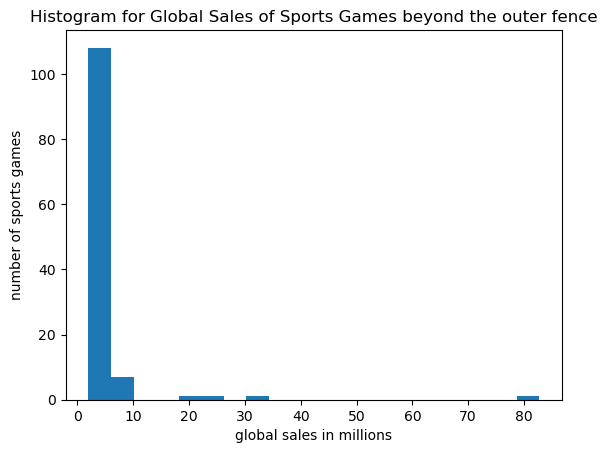

In [16]:
sports_games = games[games['Genre'] == 'Sports']
sports_games_outliers = sports_games[sports_games['Global_Sales'] > ufence['Sports']]
plt.hist(sports_games_outliers['Global_Sales'], bins = 20)
plt.title('Histogram for Global Sales of Sports Games beyond the outer fence')
plt.ylabel('number of sports games')
plt.xlabel('global sales in millions');

---- 
e.) **(4 points)** If these are successful games - what can you say about the maximum versus the typical successful game? What are the problems with using the average (overall or just the succesful games).

---

As we can see above the typical successful game (where global sales is greater than the upper outer fence) earns between 0-5 million globally. Where as the maximum successful game earns over 80 million (Wii Sports), this shows just how large the scale is for successful games. Therefore if we were to use the average global sales for games then the few very successful games would positively skew the data and the value we would receive for the average would be unreasonable for the typical game.

----

f.) **(10 points)** Create a plot of the difference between North American Sales and EU Sales with a line for the following platforms per year.
- 2600, NES, SNES, GEN, N64, GC, WII, PS, PS2, PS3, PS4, X360, XB, XOne

----


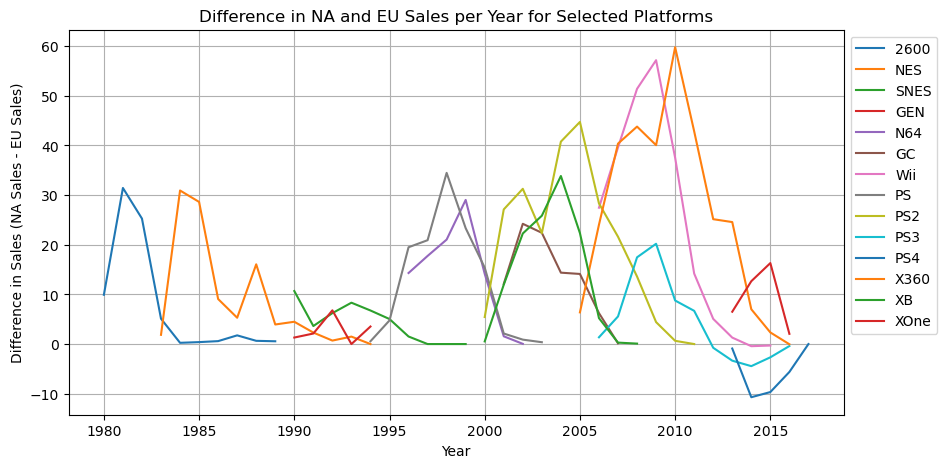

In [18]:
platforms = ['2600','NES','SNES', 'GEN', 'N64', 'GC', 'Wii', 'PS', 'PS2', 'PS3', 'PS4', 'X360', 'XB', 'XOne']
plt.figure(figsize = (10,5))
plt.title('Difference in NA and EU Sales per Year for Selected Platforms')
plt.xlabel('Year')
plt.ylabel('Difference in Sales (NA Sales - EU Sales)')
plt.grid()
for platform in platforms:

    platform_df = games[games['Platform'] == platform][['Year','NA_Sales','EU_Sales']].groupby('Year').sum()
    plt.plot(platform_df.index, platform_df['NA_Sales'] - platform_df['EU_Sales'], label = platform)
    plt.legend(loc = 'upper left', bbox_to_anchor = (1,1))


g.) **(2 points)** Qualitatively describe what you see (a few sentences). 

Here we have plotted the difference in sales between NA and EU for some selected consoles. A positive difference here shows that the console received more sales in NA than EU, and the opposite for a negative difference. The lines show how this difference changes per year and it is good at visualising when the difference in sales for each console was at its peak. Furthermore it is easy to see when consoles were intoduced and eventually taken off the market. 

h.) **(3 points)** Answer which system:

    i.) was more popular in North America (give the one which 
        is largest)
    ii.) was more popular in the EU (give the one which is largest)
    iii.) had the smallest largest difference

i) X360
ii) PS4
iii) GEN